In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm

In [7]:
df = pd.read_csv('./Salary_Data.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [9]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


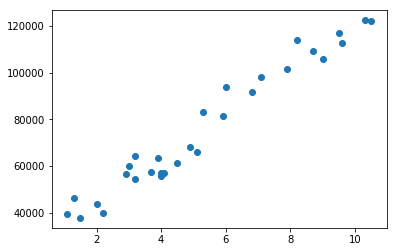

In [10]:
plt.scatter(df.YearsExperience, df.Salary)

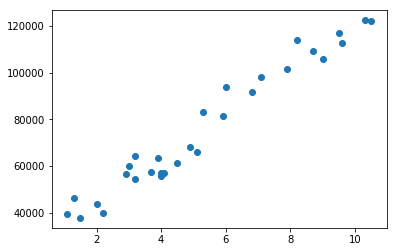

In [14]:
plt.scatter(data = df, x ='YearsExperience' , y = 'Salary' )

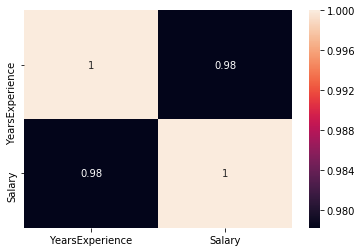

In [16]:
sns.heatmap(df.corr() ,annot=True)

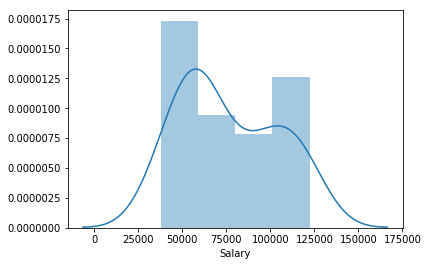

In [20]:
sns.distplot(df.Salary)

# Split data into train and test set

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X = df[['YearsExperience']]
y = df.Salary

In [25]:
type(X)

pandas.core.frame.DataFrame

In [26]:
type(y)

pandas.core.series.Series

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) #random_state: same value with the same random_state

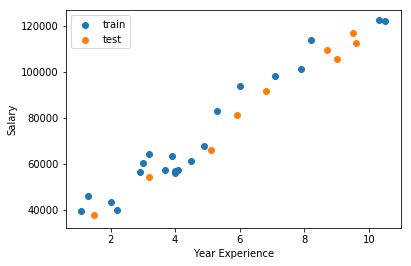

In [52]:
plt.scatter( X_train, y_train , label='train')
plt.scatter(X_test, y_test, label ='test')
plt.xlabel('Year Experience')
plt.ylabel('Salary')
plt.legend()

In [53]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [54]:
# Train model
reg.fit( X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
reg.coef_

array([9577.17174975])

In [56]:
reg.intercept_

25975.814659541138

In [58]:
# Prediction
y_predict = reg.predict(X_test)

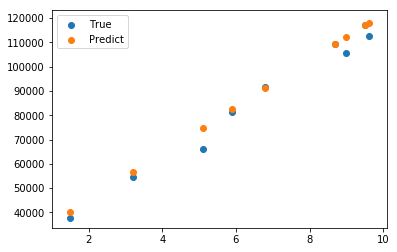

In [59]:
plt.scatter(X_test, y_test , label='True')
plt.scatter(X_test, y_predict, label='Predict')
plt.legend()

# 5. Evaluate model

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
mean_squared_error(y_test, y_predict)

17978409.49734413

# 6. Polynomial Feature

In [64]:
from sklearn.preprocessing import PolynomialFeatures

In [65]:
poly = PolynomialFeatures(degree = 2)

In [66]:
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[  1.  ,  10.3 , 106.09],
       [  1.  ,   3.9 ,  15.21],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   1.3 ,   1.69],
       [  1.  ,   6.  ,  36.  ],
       [  1.  ,   7.9 ,  62.41],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   2.9 ,   8.41],
       [  1.  ,   4.5 ,  20.25],
       [  1.  ,   1.1 ,   1.21],
       [  1.  ,   7.1 ,  50.41],
       [  1.  ,   2.2 ,   4.84],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   4.1 ,  16.81],
       [  1.  ,   3.7 ,  13.69],
       [  1.  ,   4.9 ,  24.01],
       [  1.  ,  10.5 , 110.25],
       [  1.  ,   8.2 ,  67.24],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   5.3 ,  28.09],
       [  1.  ,   4.  ,  16.  ]])

In [67]:
X_test_poly = poly.fit_transform(X_test)

In [69]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
y_predict_poly = lr_poly.predict(X_test_poly)
y_predict_poly

array([ 90943.41873142, 109309.44957349,  56594.72951873,  82301.0061382 ,
        40579.33616143, 118066.43462014, 117091.61767125,  74649.77798722,
       112224.35271571])

In [73]:
lr_poly.coef_

array([   0.        , 9313.9762626 ,   22.73262965])

In [74]:
lr_poly.intercept_

26557.223350824344